In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imgread
import patchify
import tensorflow as tf
import cv2

In [ ]:
image = imgread.xmlread('E:/OHRC south pole/ch2_ohr_ncp_20220128T0018149733_d_img_d18/data/calibrated/20220128/ch2_ohr_ncp_20220128T0018149733_d_img_d18.xml')

shape of image :  [93693, 12000]


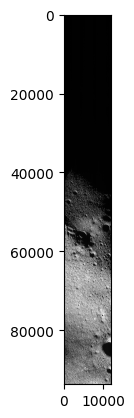

In [3]:
plt.imshow(image,cmap='gray')

In [4]:
sam1 = image[59000:59300,5000:5300]

In [5]:
sam1.shape

(300, 300)

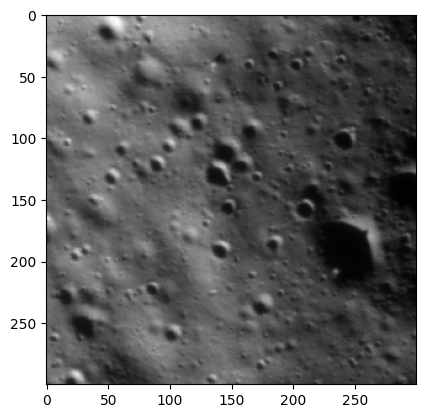

In [6]:
plt.imshow(sam1,cmap='gray')

Text(0.5, 1.0, 'Sample South Pole region')

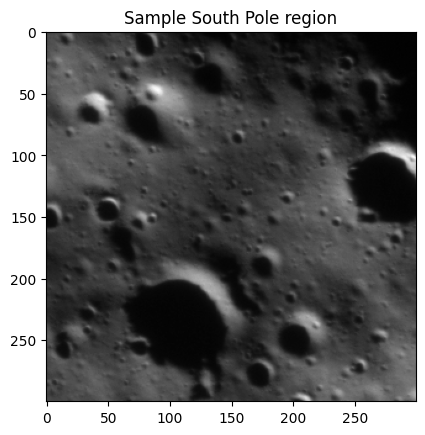

In [7]:
sam2 = image[45000:45300,5000:5300]
plt.imshow(sam2,cmap='gray')
plt.title('Sample South Pole region')

In [8]:
pt2 = patchify.patchify(sam2,(100,100),step=100)

In [9]:
pt2.shape

(3, 3, 100, 100)

In [10]:
model = tf.keras.models.load_model('MWCNN_OHRC')

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv_block (Conv_block)        (None, 100, 100, 64  74496       ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dwt_downsampling (DWT_downsamp  (None, 50, 50, 256)  0          ['conv_block[0][0]']             
 ling)                                                                                        

In [12]:
results = []

In [13]:
for i in range(pt2.shape[0]):
    row = []
    for j in range(pt2.shape[1]):

        img = pt2[i][j].reshape(1,100,100,1)
        rel = model.predict(img)
        rel = rel.reshape(100,100)
        row.append(rel)
    
    results.append(row)   

1/1 [==============================] - 0s 85ms/step


In [14]:
results = np.array(results)

In [15]:
un_pt2 = patchify.unpatchify(results,(300,300))

Text(0.5, 1.0, 'Stitched South pole region (MWCNN)')

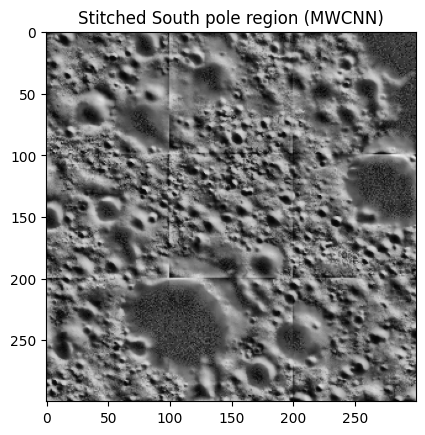

In [16]:
plt.imshow(un_pt2,cmap='gray')
plt.title('Stitched South pole region (MWCNN)')

Text(0.5, 1.0, 'MWCNN_result')

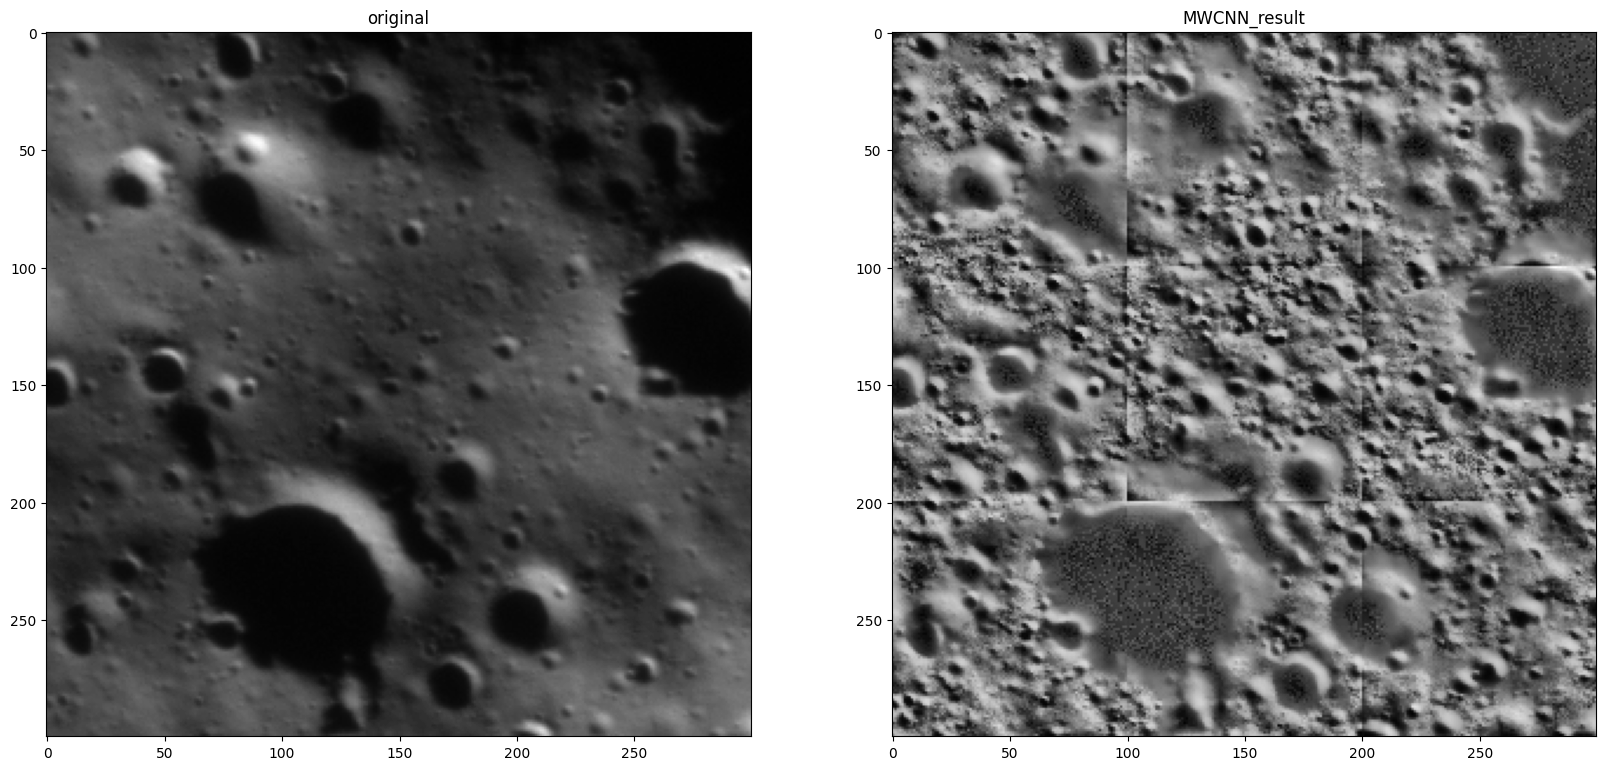

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(sam2,cmap='gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(un_pt2,cmap='gray')
plt.title('MWCNN_result')

### resize and saving patches for SAR

In [ ]:
name = 0
for i in range(3):
    for j in range(3):
        img = pt2[i][j]
        img_re = cv2.resize(img,(256,256))
        np.save('E:/SAR_TEST/'+str(name)+'.npy',img_re)
        name += 1

### loading and stitching sar model output


In [19]:
import os

In [ ]:
files = os.listdir('E:/SAR_TEST/sat_test_output')

In [21]:
files

['denoised_0.npy',
 'denoised_1.npy',
 'denoised_2.npy',
 'denoised_3.npy',
 'denoised_4.npy',
 'denoised_5.npy',
 'denoised_6.npy',
 'denoised_7.npy',
 'denoised_8.npy']

In [ ]:
sar_test_output = []
for i in files:
    sar_test_output.append(np.load('E:/SAR_TEST/sat_test_output/'+i))

In [23]:
sar_test_output = np.array(sar_test_output)

In [24]:
sar_test_output = sar_test_output.reshape(3,3,256,256)

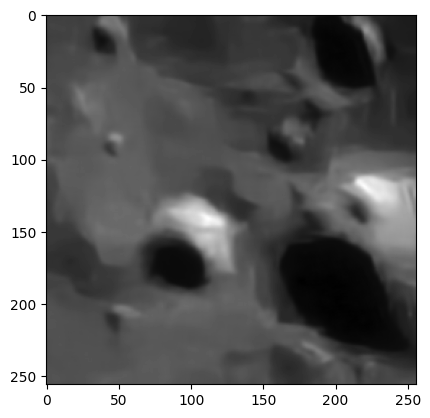

In [25]:
plt.imshow(sar_test_output[0][0],cmap='gray')

In [26]:
final_results = patchify.unpatchify(sar_test_output,(768,768))

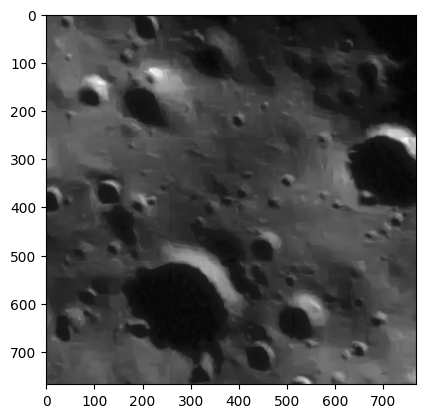

In [27]:
plt.imshow(final_results,cmap='gray')

(-0.5, 767.5, 767.5, -0.5)

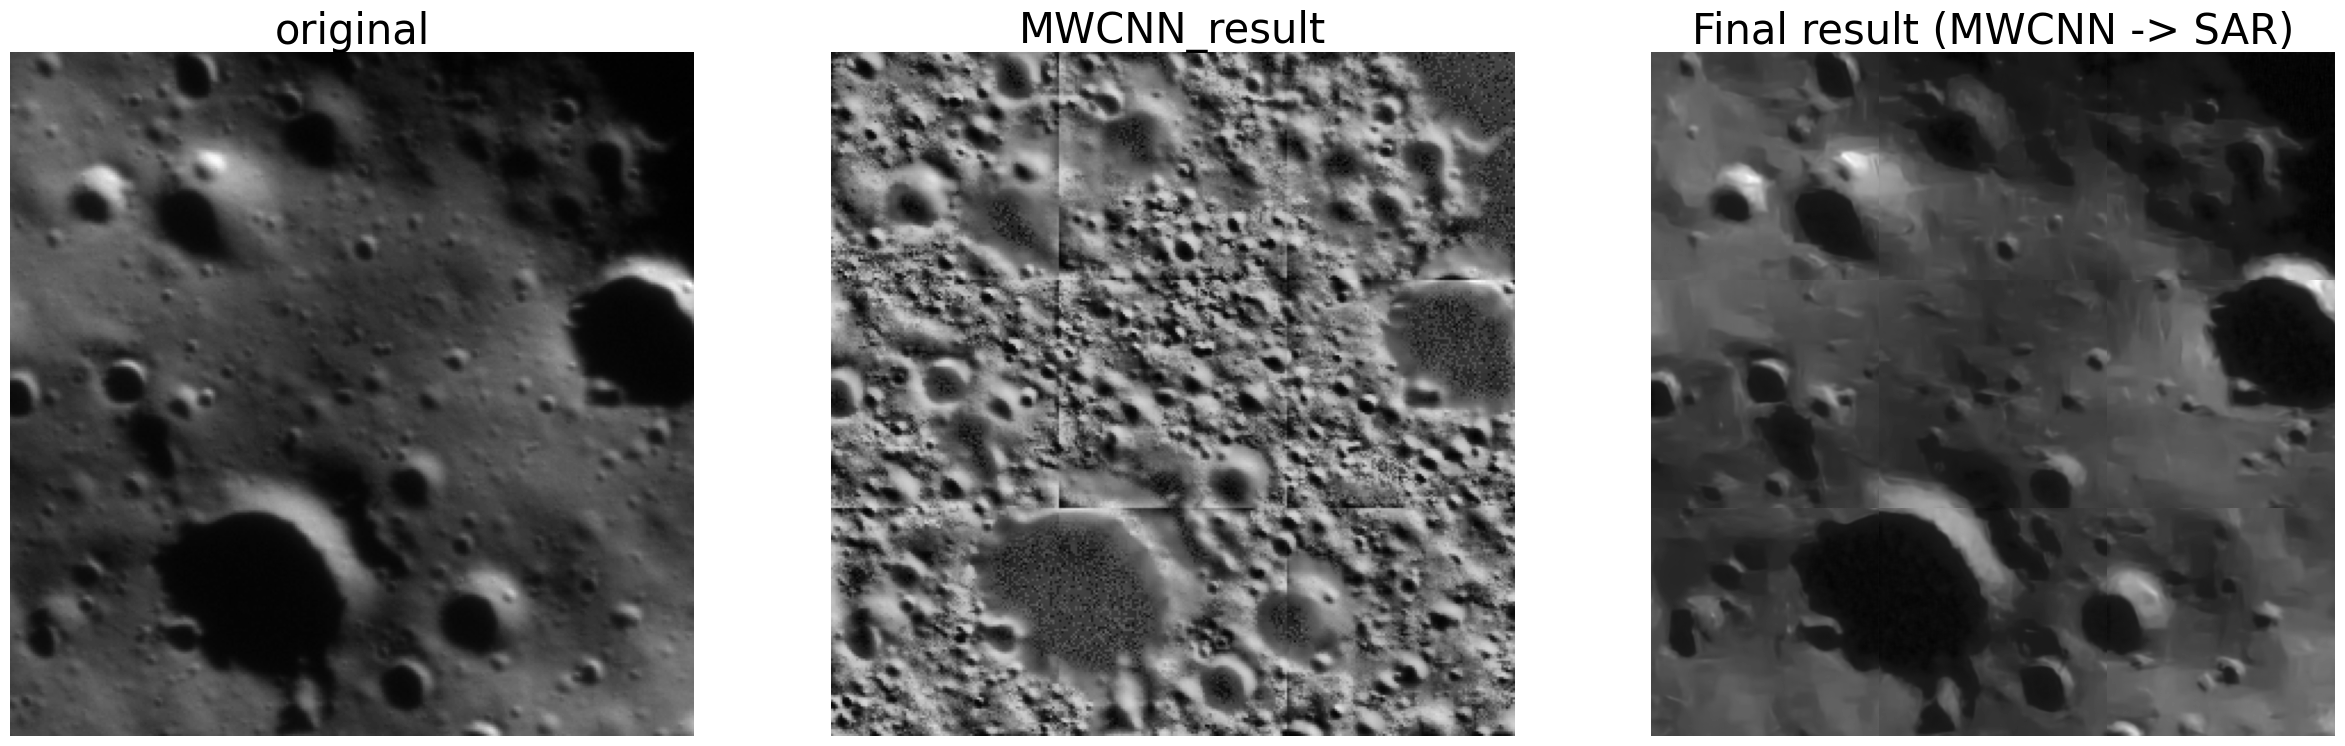

In [28]:
plt.figure(figsize=(30,20))
plt.subplot(1, 3, 1)
plt.imshow(sam2,cmap='gray')
plt.title('original',fontsize = 30)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(un_pt2,cmap='gray')
plt.title('MWCNN_result',fontsize = 30)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(final_results,cmap='gray')
plt.title('Final result (MWCNN -> SAR)',fontsize = 30)
plt.axis('off')

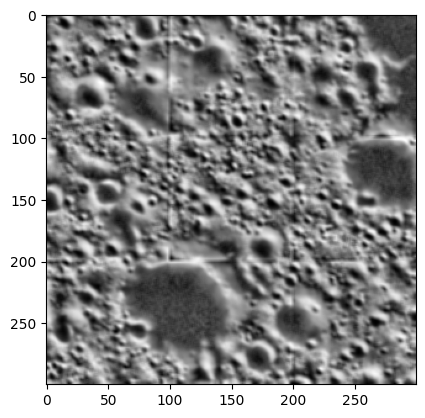

In [29]:
mwcnn_gau = cv2.blur(un_pt2,(3,3))
plt.imshow(mwcnn_gau,cmap='gray')

(-0.5, 299.5, 299.5, -0.5)

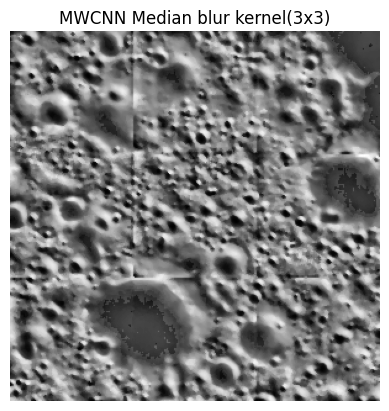

In [30]:
mwcnn_med = cv2.medianBlur(un_pt2,3)
plt.imshow(mwcnn_med,cmap='gray')
plt.title('MWCNN Median blur kernel(3x3)')
plt.axis('off')

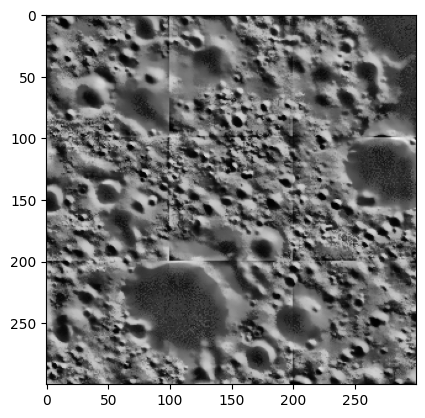

In [36]:
mwcnn_bi = cv2.bilateralFilter(un_pt2,10,20,20)
plt.imshow(mwcnn_bi,cmap='gray')